# Introduction to Python - Lecture 07 (29Oct 2018)

### Agenda for today:
+ Working with files and filesystem:
    - basics of file handling in python
+ Introduction to Numpy
+ Introduction to Matplotlib
+ Introduction to Seaborn (Next Lecture)
+ Introduction to Pandas (Next Lecture)

# Data Persistence

+ Files
    + **<font color='blue'>\*.txt**</font>, \*.xml, *.json
    + \*.csv, \*.tab, *.xlsx (covered later, with pandas)
+ Databases (covered later in thhe course), when you want to capture relationships between data / entities

# Built-in *<font color='blue'>file</font>* object

+ Basic format:
```python
fh = open('<filename>', '<mode>')   # Creates a file object fh
```
+ *filename* can be _**absolute**_ or _**relative**_
+ *mode*: {'r', 'w', 'a'}; Default='r'
+ 'r': open file for reading if exists, else **<font color='blue'>FileNotFoundError</font>**
+ 'w': open new file for writing; overwrite if exists; use 'a' to avoid overwriting

```python
fh = open('data/data.txt')
type(fh)
dir(fh)
```

+ If the file does not exist, open will raise a **FileNotFound** error with traceback

**Notes**:
+ *fh* is not the file itself, but a handle/reference to it. Use it to do desired operations (read/write).
<br />  
![alt text](filehandle.svg)
<br />
+ <font color='blue'>Some additional mode options: 'rb', 'wb' for reading and writing binary files; '+' to open the file for both reading and writing.

In [3]:
fh = open('data/data.txt')
# type(fh)
dir(fh)

['_CHUNK_SIZE',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_checkClosed',
 '_checkReadable',
 '_checkSeekable',
 '_checkWritable',
 '_finalizing',
 'buffer',
 'close',
 'closed',
 'detach',
 'encoding',
 'errors',
 'fileno',
 'flush',
 'isatty',
 'line_buffering',
 'mode',
 'name',
 'newlines',
 'read',
 'readable',
 'readline',
 'readlines',
 'seek',
 'seekable',
 'tell',
 'truncate',
 'writable',
 'write',
 'writelines']

# Reading from Files in "text mode"
+ File content is always read in as strings  
<br />
+ Here are the **most common approaches**:

    - **Read all data at once as a string**

    ```python
    import pprint
    fh = open('data/data.txt', 'r')
    data = fh.read()              # to read in all data as one big string
    print(type(data), '\n\n')
    print(data)
    print('\n', data.split('\n'))   # split the big string on new line character (\n); '\r\n' on windows
    ```

In [6]:
import pprint
fh = open('data/data.txt', 'r')
data = fh.read()              # to read in all data as one big string
print(type(data), '\n\n')
#print(data)
print('\n', data.split('\n'))  

<class 'str'> 



 ['Writing programs or programming is a very creative', 'and rewarding activity  You can write programs for', 'many reasons ranging from making your living to solving', 'a difficult data analysis problem to having fun to helping', 'someone else solve a problem  This book assumes that', '{\\em everyone} needs to know how to program and that once', 'you know how to program, you will figure out what you want', 'to do with your newfound skills', '', 'We are surrounded in our daily lives with computers ranging', 'from laptops to cell phones  We can think of these computers', 'as our personal assistants who can take care of many things', 'on our behalf  The hardware in our current-day computers', 'is essentially built to continuously ask us the question', 'What would you like me to do next', '', 'Our computers are fast and have vasts amounts of memory and ', 'could be very helpful to us if we only knew the language to ', 'speak to explain to the computer what we would like 

+ **file pointers and *<font color='blue'>seek</font>* operation**

    ```python
data_read_again = fh.read()        # can't read more without resetting the read pointer
print("length of data_read_again is: ", len(data_read_again))
fh.seek(0, 0)          # reset the pointer to beginning of the file: fh.seek(offset, from_what)
                       # https://docs.python.org/3/tutorial/inputoutput.html
data_now = fh.read()
print(data_now)
```

In [11]:
data_read_again = fh.read() 
print("length of data_read_again is: ", len(data_read_again))

fh.seek(0, 0)

data_now = fh.read()
print("length of data_read_again is: ", len(data_now))


length of data_read_again is:  0
length of data_read_again is:  1170


+ **Read individual lines as strings**
```python
fh.seek(0, 0)
data = fh.readlines()       # returns list of strings
print(type(data), "\n\n")   # check out the \n newline character at the end of lines
print(data)         # (\r\n on windows machines)
```

In [12]:
fh.seek(0, 0)
data = fh.readlines()       # returns list of strings
print(type(data), "\n\n")   # check out the \n newline character at the end of lines
print(data) 

<class 'list'> 


['Writing programs or programming is a very creative\n', 'and rewarding activity  You can write programs for\n', 'many reasons ranging from making your living to solving\n', 'a difficult data analysis problem to having fun to helping\n', 'someone else solve a problem  This book assumes that\n', '{\\em everyone} needs to know how to program and that once\n', 'you know how to program, you will figure out what you want\n', 'to do with your newfound skills\n', '\n', 'We are surrounded in our daily lives with computers ranging\n', 'from laptops to cell phones  We can think of these computers\n', 'as our personal assistants who can take care of many things\n', 'on our behalf  The hardware in our current-day computers\n', 'is essentially built to continuously ask us the question\n', 'What would you like me to do next\n', '\n', 'Our computers are fast and have vasts amounts of memory and \n', 'could be very helpful to us if we only knew the language to \n', 'speak to explain 

+ **Iterate over large files**
```python
fh.seek(0, 0)
for line in fh:           # 'fh' is iterable; use in iteration context for efficient
    print(len(line), line)  # reading of large files
fh.close()                # close file; good practice (esp. when writing files)
```

In [16]:
fh = open('data/data.txt', 'r')
fh.seek(0, 0)
for line in fh:           # 'fh' is iterable; use in iteration context for efficient
    print(len(line), line)  # reading of large files
fh.close()  

51 Writing programs or programming is a very creative

51 and rewarding activity  You can write programs for

56 many reasons ranging from making your living to solving

59 a difficult data analysis problem to having fun to helping

53 someone else solve a problem  This book assumes that

58 {\em everyone} needs to know how to program and that once

59 you know how to program, you will figure out what you want

32 to do with your newfound skills

1 

60 We are surrounded in our daily lives with computers ranging

61 from laptops to cell phones  We can think of these computers

60 as our personal assistants who can take care of many things

57 on our behalf  The hardware in our current-day computers

57 is essentially built to continuously ask us the question

34 What would you like me to do next

1 

61 Our computers are fast and have vasts amounts of memory and 

61 could be very helpful to us if we only knew the language to 

59 speak to explain to the computer what we would like it 

+ **Context manager**
```python
with open('data/data.txt', 'r') as fh:  # Context-manager; automatically closes the file
    for line in fh:
        print(line)
print('\nFile closed? : ', fh.closed)
```

In [18]:
with open('data/data.txt', 'r') as fh:  # Context-manager; automatically closes the file
    for line in fh:
        print(line.strip())
print('\nFile closed? : ', fh.closed)

Writing programs or programming is a very creative
and rewarding activity  You can write programs for
many reasons ranging from making your living to solving
a difficult data analysis problem to having fun to helping
someone else solve a problem  This book assumes that
{\em everyone} needs to know how to program and that once
you know how to program, you will figure out what you want
to do with your newfound skills

We are surrounded in our daily lives with computers ranging
from laptops to cell phones  We can think of these computers
as our personal assistants who can take care of many things
on our behalf  The hardware in our current-day computers
is essentially built to continuously ask us the question
What would you like me to do next

Our computers are fast and have vasts amounts of memory and
could be very helpful to us if we only knew the language to
speak to explain to the computer what we would like it to
do next If we knew this language we could tell the
computer to do tasks 

# Writing to Files in "text mode"
+ Like reading, writing is also done as strings
<br />
+ Here are the **most common approaches**:

```python
fh = open('data/fresh.txt', 'w')           # Open a new file in write mode
fh.write('This is the 1st line\n')    # Write a line; 
                                      # Note that newline chars must be explicitly added
fh.close()
```



In [19]:
fh = open('data/fresh.txt', 'w')           # Open a new file in write mode
fh.write('This is the 1st line\n')    # Write a line; 
                                      # Note that newline chars must be explicitly added
fh.close()

+ **Flushing buffers**

```python
fh = open('data/fresh.txt', 'a')           # Open the earlier file in 'append' mode
                                      #    to avoid overwriting
fh.write('This is the 2nd line\n')    # Write a line; 
                                      # Note that newline chars must be explicitly added
fh.flush()                            # Clears the buffer
```

In [22]:
fh = open('data/fresh.txt', 'a')           # Open the earlier file in 'append' mode
                                      #    to avoid overwriting
fh.write('This is the 3rd line\n')    # Write a line; 
                                      # Note that newline chars must be explicitly added
fh.flush() 

+ **Write multiple lines at once**

```python
fh.writelines(['This is the 3rd line\n', 'This is the 4th line\n'])   # Note the newline
fh.flush()
```

In [24]:
fh.writelines(['This is the 3rd line\n', 'This is the 4th line\n'])   # Note the newline
fh.flush()

Help on built-in function writelines:

writelines(lines, /) method of _io.TextIOWrapper instance



+ **Write iteratively**

```python
more_lines = ['5th line', '6th line', '7th line']

for line in more_lines:       # iteration context
    fh.write(line + '\n')
    fh.flush()                # Don't need to add flush after every write: inefficient; let python handle it
fh.close()
```



In [25]:
more_lines = ['5th line', '6th line', '7th line']

for line in more_lines:       # iteration context
    fh.write(line + '\n')
#     fh.flush()                # Don't need to add flush after every write: inefficient; let python handle it
fh.close()

### There are specialized modules to work with specific file formats:
1. csv (comma-separated values)
2. xlrd (excel documents): **pip install** xlrd OR **conda install** xlrd
3. json (hierarchical text-based format like python dictionares)
4. yaml (another hierarchical text-based format like json): **pip install** pyyaml OR **conda install** pyyaml
5. pandas (works with csv, tsv, xls and many more formats): **pip install pandas** OR **conda install pandas**

## os.path module
```python
import os
dir(os.path)  # Note that path is another module that os module imports. 
              # When we import os, path becomes available as a module variable within os namespace.
              # --> module / namespace hierarchy
```
+ **path parsing:**
    - os.path.split(<path_str>):
    - os.path.splitext(<path_str>) 
```python
# Ex.
print(os.path.split(os.path.expanduser('~/Documents/my_data.txt')))
print(os.path.splitext('my_data.txt'))
```
+ **path building:**
    - os.path.join(<path_components>)
```python
# Ex.
print(os.path.join('~', 'Desktop', 'itp'))
```
+ **common tests:**
    - os.path.<test>, where test = {isdir(), isfile(), exists(), ...}
```python
# Ex.
print(os.path.isdir('data/data.txt'))
print(os.path.isfile('data/data.txt')
print(os.path.exists('data')
print(os.path.exists('data.txt')
print(os.path.exists('/Users/mark')
```
+ **listing contents of a dir:**
    - os.listdir
```python
# Ex.
import pprint
pprint.pprint(os.listdir(os.path.expanduser('~/Desktop')))
pprint.pprint(os.listdir('.'))
pprint.pprint(os.listdir('..'))
```

In [42]:
pprint.pprint(os.listdir('../..'))


['assignments',
 'test.py',
 '2018_fall_itp',
 'grivam01@bigpurple.nyumc.org',
 '2018_ITP']


## Numpy

+ A package for scientific computing
+ A more powerful version of lists
+ All of the methods are optimized to run fast
+ Great for linear algebra, statistical analysis

Numpy is not part of Pythons standard libraries and needs to be installed.

This can be done using the conda command if you are using Anaconda:

```bash
conda install numpy
```

Alternatively this can be done using the built in Python package manager Pip

```bash
pip install numpy
```

Once numpy is installed it then needs to be imported to use its functionality

```python
import numpy as np
```

In [43]:
import numpy as np

### Lists recap

Lists are created using '[]'

```python
l1 = [1, 2, 3, 4]
```

Lists can contain mixed types

```python
l2 = [1, 'a', {'abs': abs}, (1, 2)]
```


Lists can be joined using the + operator which creates a new list

```python
l3 = l1 + l2
```

Lists can be extended using the .extend() method which happens in place

```python
l1.extend(l2)
```

The range() function can be used to initialize numeric lists

```python
base = list(range(0, 101, 2))
```

To perform calculations using a list, a for loop is required

```python
base_squared = []
for x in base:
    base_squared.append(x**2)
```

In [44]:
base = list(range(0, 101, 2))
base_squared = []
for x in base:
    base_squared.append(x**2)

print(base)
print(base_squared)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100]
[0, 4, 16, 36, 64, 100, 144, 196, 256, 324, 400, 484, 576, 676, 784, 900, 1024, 1156, 1296, 1444, 1600, 1764, 1936, 2116, 2304, 2500, 2704, 2916, 3136, 3364, 3600, 3844, 4096, 4356, 4624, 4900, 5184, 5476, 5776, 6084, 6400, 6724, 7056, 7396, 7744, 8100, 8464, 8836, 9216, 9604, 10000]


### Creating arrays with Numpy

There are a number of ways of creating numpy arrays.

##### Converting a regular python list into a numpy array:

```python
var = np.array(< list >)
```

This is useful when the original list needs to be constructed from a file. Numpy does not have a simple method to append to lists. For this reason it is sometimes easier to build a normal python list before converting it to a numpy array.

```python
characters = []
for i in range(32, 100):
    characters.append(chr(i))
print(characters)
np_char = np.array(characters)
print(np_char)
```

In [45]:
characters = []
for i in range(32, 100):
    characters.append(chr(i))
print(characters)
np_char = np.array(characters)
print(np_char)

[' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c']
[' ' '!' '"' '#' '$' '%' '&' "'" '(' ')' '*' '+' ',' '-' '.' '/' '0' '1'
 '2' '3' '4' '5' '6' '7' '8' '9' ':' ';' '<' '=' '>' '?' '@' 'A' 'B' 'C'
 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U'
 'V' 'W' 'X' 'Y' 'Z' '[' '\\' ']' '^' '_' '`' 'a' 'b' 'c']


##### Initializing arrays using numpy

1. Creating an array with *n* zeros

```python
lst = np.zeros(25)
lst_2d = np.zeros((5, 5))
```

2. Creating an array with *n* ones

```python
lst = np.ones(25)
lst_2d = np.ones((5, 5))
```

3. Using a range(start, end, incriment)

```python
lst = np.arange(10, 20, 2)
```

4. Linspace is similar to range - linspace(start, end, number_of_elements) 

```python
lst = np.linspace(10, 20, 2)
```

5. Filling a list with random numbers between [0, 1)

```python
lst = np.random.rand(5)
lst_2d = np.random.rand(5, 5)
```

In [4]:
import numpy as np
np.random.seed(123454321)
lst = np.random.rand(5)
lst_2d = np.random.rand(5, 5)
lst_2d

array([[0.06689521, 0.79998576, 0.57903857, 0.40696955, 0.52646909],
       [0.39550806, 0.33068131, 0.08150117, 0.46675002, 0.32785017],
       [0.14159486, 0.35035181, 0.68039871, 0.97799116, 0.13861149],
       [0.05794118, 0.84421031, 0.47138771, 0.5549029 , 0.58181592],
       [0.22444156, 0.30352393, 0.99436612, 0.59083201, 0.70012481]])

### Numpy mathematical operations

Numpy is a tool which simplifies performing linear algebra in Python, for this reason most operations will match linear algebra operations.

1. Addition
    1. Adding a scalar to a matrix does not follow normal mathematical rules as the scalar is 
    added to each object in the matrix
  
    ```
    ```
        $
            \begin{bmatrix} 
            a_{0,0} & a_{0,1} & \cdots & a_{0,n} \\
            a_{1,0} & a_{1,1} & \cdots & a_{1,n} \\
            \vdots & \vdots & \ddots & \vdots \\
            a_{m,0} & a_{m,1} & \cdots & a_{m,n} \\
            \end{bmatrix} + C
        $
        $ =
            \begin{bmatrix} 
            a_{0,0} + C & a_{0,1} + C & \cdots & a_{0,n} + C \\
            a_{1,0} + C & a_{1,1} + C & \cdots & a_{1,n} + C \\
            \vdots & \vdots & \ddots & \vdots \\
            a_{m,0} + C & a_{m,1} + C & \cdots & a_{m,n} + C \\
            \end{bmatrix}
        $

    ```python
    lst_2d = np.ones((n, m)) + C
    ```

In [6]:
lst_2d = np.ones((2, 3)) + 5
lst_2d

array([[6., 6., 6.],
       [6., 6., 6.]])

1. 
    2. Adding two numpy arrays requires them to have the same shape
  
    ```
    ```
        $
            \begin{bmatrix} 
            a_{0,0} & a_{0,1} & \cdots & a_{0,n} \\
            a_{1,0} & a_{1,1} & \cdots & a_{1,n} \\
            \vdots & \vdots & \ddots & \vdots \\
            a_{m,0} & a_{m,1} & \cdots & a_{m,n} \\
            \end{bmatrix} + 
            \begin{bmatrix} 
            b_{0,0} & b_{0,1} & \cdots & b_{0,n} \\
            b_{1,0} & b_{1,1} & \cdots & b_{1,n} \\
            \vdots & \vdots & \ddots & \vdots \\
            b_{m,0} & b_{m,1} & \cdots & b_{m,n} \\
            \end{bmatrix} =
            \begin{bmatrix} 
            a_{0,0} + b_{0,0} & a_{0,1} + b_{0,1} & \cdots & a_{0,n} + b_{0,n} \\
            a_{1,0} + b_{1,0} & a_{1,1} + b_{1,1} & \cdots & a_{1,n} + b_{1,n} \\
            \vdots & \vdots & \ddots & \vdots \\
            a_{m,0} + b_{m,0} & a_{m,1} + b_{m,1} & \cdots & a_{m,n} + b_{m,n} \\
            \end{bmatrix}
        $

    ```python
    lst_2d = np.ones((n, m)) + np.ones((n, m))
    ```
    

In [9]:
lst_2d = np.ones((2, 3)) + np.ones((2, 3))
lst_2d

ValueError: operands could not be broadcast together with shapes (2,3) (3,3) 

2. Multiplication
    1. By a scalar - each element is multiplied by the scalar
  
    ```
    ```
        $
            \begin{bmatrix} 
            a_{0,0} & a_{0,1} & \cdots & a_{0,n} \\
            a_{1,0} & a_{1,1} & \cdots & a_{1,n} \\
            \vdots & \vdots & \ddots & \vdots \\
            a_{m,0} & a_{m,1} & \cdots & a_{m,n} \\
            \end{bmatrix} * C
        $
        $ =
            \begin{bmatrix} 
            a_{0,0} * C & a_{0,1} * C & \cdots & a_{0,n} * C \\
            a_{1,0} * C & a_{1,1} * C & \cdots & a_{1,n} * C \\
            \vdots & \vdots & \ddots & \vdots \\
            a_{m,0} * C & a_{m,1} * C & \cdots & a_{m,n} * C \\
            \end{bmatrix}
        $

    ```python
    lst_2d = np.ones((n, m)) * C
    ```

In [10]:
lst_2d = np.ones((2, 3)) * 5
lst_2d

array([[5., 5., 5.],
       [5., 5., 5.]])

2.    
    2. Multiplying two equally sized matricies results in element wise multiplication
  
    ```
    ```
        $
            \begin{bmatrix} 
            a_{0,0} & a_{0,1} & \cdots & a_{0,n} \\
            a_{1,0} & a_{1,1} & \cdots & a_{1,n} \\
            \vdots & \vdots & \ddots & \vdots \\
            a_{m,0} & a_{m,1} & \cdots & a_{m,n} \\
            \end{bmatrix} * 
            \begin{bmatrix} 
            b_{0,0} & b_{0,1} & \cdots & b_{0,n} \\
            b_{1,0} & b_{1,1} & \cdots & b_{1,n} \\
            \vdots & \vdots & \ddots & \vdots \\
            b_{m,0} & b_{m,1} & \cdots & b_{m,n} \\
            \end{bmatrix} =
            \begin{bmatrix} 
            a_{0,0} * b_{0,0} & a_{0,1} * b_{0,1} & \cdots & a_{0,n} * b_{0,n} \\
            a_{1,0} * b_{1,0} & a_{1,1} * b_{1,1} & \cdots & a_{1,n} * b_{1,n} \\
            \vdots & \vdots & \ddots & \vdots \\
            a_{m,0} * b_{m,0} & a_{m,1} * b_{m,1} & \cdots & a_{m,n} * b_{m,n} \\
            \end{bmatrix}
        $

    ```python
    lst_2d = np.ones((n, m)) * np.ones((n, m))
    ```
    

In [12]:
lst_2d = np.ones((2, 3)) * (np.ones((2, 3)) * 2)
lst_2d

array([[2., 2., 2.],
       [2., 2., 2.]])

2. 
    3. Multiplying a n x m matrix with a vector of size n results in each row being multiplied by the vector
  
    ```
    ```
        $
            \begin{bmatrix} 
            a_{0,0} & a_{0,1} & \cdots & a_{0,n} \\
            a_{1,0} & a_{1,1} & \cdots & a_{1,n} \\
            \vdots & \vdots & \ddots & \vdots \\
            a_{m,0} & a_{m,1} & \cdots & a_{m,n} \\
            \end{bmatrix} * 
            \begin{bmatrix} 
            b_{0} & b_{1} & \cdots & b_{n}
            \end{bmatrix} =
            \begin{bmatrix} 
            a_{0,0} * b_{0} & a_{0,1} * b_{1} & \cdots & a_{0,n} * b_{n} \\
            a_{1,0} * b_{0} & a_{1,1} * b_{1} & \cdots & a_{1,n} * b_{n} \\
            \vdots & \vdots & \ddots & \vdots \\
            a_{m,0} * b_{0} & a_{m,1} * b_{1} & \cdots & a_{m,n} * b_{n} \\
            \end{bmatrix}
        $

    ```python
    lst_2d = np.ones((6, 5)) * np.array([1, 2, 3, 2, 1])
    ```

In [14]:
lst_2d = np.ones((6, 5)) + np.array([1, 2, 3, 2, 1])
lst_2d

array([[2., 3., 4., 3., 2.],
       [2., 3., 4., 3., 2.],
       [2., 3., 4., 3., 2.],
       [2., 3., 4., 3., 2.],
       [2., 3., 4., 3., 2.],
       [2., 3., 4., 3., 2.]])

3. Division follows the same rules as multiplication

    ```python
    lst_2d = np.ones((6, 5)) / np.array([1, 2, 3, 2, 1])
    ```


### Accessing elements/rows/columns


##### Constructing a 2d array for demonstration purposes

```python
lst_2d = np.vstack((np.arange(1, 100, 2), np.arange(100, 1, -2)))
```

This is a 2D array in which the first row comprises of all the odd numbers between [1 and 99] and the second row comprises the even numbers between [100 and 2].

In [15]:
lst_2d = np.vstack((np.arange(1, 100, 2), np.arange(100, 1, -2)))
lst_2d

array([[  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
         27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,  51,
         53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,
         79,  81,  83,  85,  87,  89,  91,  93,  95,  97,  99],
       [100,  98,  96,  94,  92,  90,  88,  86,  84,  82,  80,  78,  76,
         74,  72,  70,  68,  66,  64,  62,  60,  58,  56,  54,  52,  50,
         48,  46,  44,  42,  40,  38,  36,  34,  32,  30,  28,  26,  24,
         22,  20,  18,  16,  14,  12,  10,   8,   6,   4,   2]])

##### Accessing individual values

1. Using standard list indexing
```python
# lst_2d[row_index][column_index]
lst_2d[1][2]
```

2. Numpy has more advanced indexing which allows both values to be specified together
```python
# lst_2d[row_index, column_index]
lst_2d[1, 2]
```

##### Retrieving a row

```python
# lst_2d[row_index, :]
lst_2d[0, :] # return an array of all the elements in the first row
lst_2d[1, :] # return an array of all the elements in the second row
```

##### Retrieving a column

```python
# lst_2d[:, column_index]
lst_2d[:, 5] # return an array of all the elements in the fifth column
lst_2d[:, 20] # return an array of all the elements in the twentieth column
```

In [19]:
lst_2d[:, ::2]

array([[  1,   5,   9,  13,  17,  21,  25,  29,  33,  37,  41,  45,  49,
         53,  57,  61,  65,  69,  73,  77,  81,  85,  89,  93,  97],
       [100,  96,  92,  88,  84,  80,  76,  72,  68,  64,  60,  56,  52,
         48,  44,  40,  36,  32,  28,  24,  20,  16,  12,   8,   4]])

### A few numpy functions 

#### Note - There are often two ways of using Numpy functions

1. np.<< function >>()
2. np_list.<< function >>()

#### Example

1. Using the np function
    ```python
lst = np.arange(10)
m = np.mean(lst)
    ```
2. Using the array method
    ```python
lst = np.arange(10)
m = lst.mean()
    ```
    
There are some functions which are only available as one of these two options. But when both are available they are generally interchangable.

In [22]:
lst = np.arange(10)
m = np.mean(lst)
print(m)

lst = np.arange(10)
m = lst.mean()
print(m
     )

4.5
4.5


#### Min and Max

The names are self explanatory, they will output the minimum and maximum values of the array.

##### 1D Arrays

```python
lst = np.array([21, 19, 11, 17, 20])
print(lst.min())
print(lst.max())
```

In [23]:
lst = np.array([21, 19, 11, 17, 20])
print(lst.min())
print(lst.max())

11
21


##### 2D Arrays

1. Getting the min and max for the entire 2D array

```python
# How I generated the random 2D array
# lst = np.random.randint(5, 25, (5, 5))
lst = np.array(
      [[15, 21,  7, 21, 24],
       [13, 19, 21, 23,  7],
       [ 8, 17, 13, 21, 14],
       [11, 16, 20, 20, 12],
       [22,  5,  8, 23,  8]]
)

min_v = lst.min()
max_v = lst.max()

print('The min is {}'.format(min_v))
print('The max is {}'.format(max_v))
```

In [24]:

# How I generated the random 2D array
# lst = np.random.randint(5, 25, (5, 5))
lst = np.array(
      [[15, 21,  7, 21, 24],
       [13, 19, 21, 23,  7],
       [ 8, 17, 13, 21, 14],
       [11, 16, 20, 20, 12],
       [22,  5,  8, 23,  8]]
)

min_v = lst.min()
max_v = lst.max()

print('The min is {}'.format(min_v))
print('The max is {}'.format(max_v))

The min is 5
The max is 24


Getting the min and max for each column

```python
lst = np.array(
      [[15, 21,  7, 21, 24],
       [13, 19, 21, 23,  7],
       [ 8, 17, 13, 21, 14],
       [11, 16, 20, 20, 12],
       [22,  5,  8, 23,  8]]
)

min_v = lst.min(axis=0)
max_v = lst.max(axis=0)

print('The min for each column is {}'.format(min_v))
print('The max for each column is {}'.format(max_v))

```

In [25]:
lst = np.array(
      [[15, 21,  7, 21, 24],
       [13, 19, 21, 23,  7],
       [ 8, 17, 13, 21, 14],
       [11, 16, 20, 20, 12],
       [22,  5,  8, 23,  8]]
)

min_v = lst.min(axis=0)
max_v = lst.max(axis=0)

print('The min for each column is {}'.format(min_v))
print('The max for each column is {}'.format(max_v))

The min for each column is [ 8  5  7 20  7]
The max for each column is [22 21 21 23 24]


Getting the min and max for each row

```python
lst = np.array(
      [[15, 21,  7, 21, 24],
       [13, 19, 21, 23,  7],
       [ 8, 17, 13, 21, 14],
       [11, 16, 20, 20, 12],
       [22,  5,  8, 23,  8]]
)

min_v = lst.min(axis=1)
max_v = lst.max(axis=1)

print('The min for each row is {}'.format(min_v))
print('The max for each row is {}'.format(max_v))
```

In [26]:
lst = np.array(
      [[15, 21,  7, 21, 24],
       [13, 19, 21, 23,  7],
       [ 8, 17, 13, 21, 14],
       [11, 16, 20, 20, 12],
       [22,  5,  8, 23,  8]]
)

min_v = lst.min(axis=1)
max_v = lst.max(axis=1)

print('The min for each row is {}'.format(min_v))
print('The max for each row is {}'.format(max_v))

The min for each row is [ 7  7  8 11  5]
The max for each row is [24 23 21 20 23]


#### The axis argument
```
      [[15, 21,  7, 21, 24],  |
       [13, 19, 21, 23,  7],  |
       [ 8, 17, 13, 21, 14],  | axis = 0
       [11, 16, 20, 20, 12],  |
       [22,  5,  8, 23,  8]]  V
       
       ------------------->
               axis=1
```

- axis 0 applies the operation row-wise
- axis 1 appries the operation column-wise

If the data has a third dimension then axis 2 will apply the function in that dimension and so on...

##### Min Max normalization

Subtract the minimum value from each element and divide it by the difference between the maximum and the minimum.

$$ \frac{ X - X_{min}}{X_{max} - X_{min}} $$

Using numpy it is easy to perform these types of calculations

```python
lst = np.array([21, 19, 11, 17, 20])
lst_norm = (lst - lst.min()) / (lst.max() - lst.min())
lst_norm
```

In [27]:
lst = np.array([21, 19, 11, 17, 20])
lst_norm = (lst - lst.min()) / (lst.max() - lst.min())
lst_norm

array([1. , 0.8, 0. , 0.6, 0.9])

The same method will also work even if the data is 2 dimensional

```python
lst = np.array(
      [[15, 21,  7, 21, 24],
       [13, 19, 21, 23,  7],
       [ 8, 17, 13, 21, 14],
       [11, 16, 20, 20, 12],
       [22,  5,  8, 23,  8]]
)
lst_norm = (lst - lst.min()) / (lst.max() - lst.min())
lst_norm
```

In [28]:
lst = np.array(
      [[15, 21,  7, 21, 24],
       [13, 19, 21, 23,  7],
       [ 8, 17, 13, 21, 14],
       [11, 16, 20, 20, 12],
       [22,  5,  8, 23,  8]]
)
lst_norm = (lst - lst.min()) / (lst.max() - lst.min())
lst_norm

array([[0.52631579, 0.84210526, 0.10526316, 0.84210526, 1.        ],
       [0.42105263, 0.73684211, 0.84210526, 0.94736842, 0.10526316],
       [0.15789474, 0.63157895, 0.42105263, 0.84210526, 0.47368421],
       [0.31578947, 0.57894737, 0.78947368, 0.78947368, 0.36842105],
       [0.89473684, 0.        , 0.15789474, 0.94736842, 0.15789474]])

#### Some additional functions

1. mean([axis = 0, 1, ...])
  - This will return the mean (row-wise/column-wise/everything)
2. std([axis = 0, 1, ...])
  - This will return the standard deviation (row-wise/column-wise/everything)
3. sum([axis = 0, 1, ...])
  - This will the sum (row-wise/column-wise/everything)
4. np.concat((np_array, np_array, ...))
  - This will combine numpy arrays into a single array

These are just a few of the functions which numpy offers. All of the available functions are listed in their documentation [https://docs.scipy.org/doc/numpy-1.15.1/reference/#]

### The basics of Seaborn / Matplotlib

Just like Numpy, Seaborn is an external library which needs to be installed.

This can be done using the conda command if you are using Anaconda:

```shell
conda install seaborn
```

Alternatively this can be done using the built in Python package manager Pip

```shell
pip install seaborn
```

Once numpy is installed it then needs to be imported to use its functionality.

Seaborn will also install Matplotlib so there is no need to install both of them.

```python
import seaborn as sns
import matplotlib.pyplot as plt

# If you are in jupyter then you need to tell matplotlib to display the plots in the notebook
%matplotlib inline
```

Matplotlib: 
+ library for generating plots in Python. 
+ It is extremely powerful 
  + every aspect of a plot can be customized 
+ Unfortunately many of the plots are not very aesthetically pleasing out of the box
  
Seaborn:
+ Uses Matplotlib in the background
+ Allows the same customizability that Matplotlib does
+ Has options for setting plot themes
  + These generally look better than the default Matplotlib plots

### Creating a plot using Matplotlib

#### Simple line plot

Matplotlib needs to be imported before we can use it.


As with many of the commonly used libraries it has a name which it is assigned to:
+ plt

```python
import matplotlib.pyplot as plt
%matplotlib inline
```

Matplotlib will work with both regular lists as well as numpy arrays

```python
# list of numbers to plot
lst = [21, 19, 11, 17, 20]

plt.plot(lst)
plt.show()
```

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline



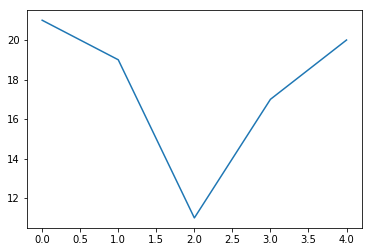

In [30]:
# list of numbers to plot
lst = [21, 19, 11, 17, 20]

plt.plot(lst)
plt.show()

#### Adding more lines to the plot

```python
lst = [21, 19, 11, 17, 20]
lst_2 = np.random.randint(5, 25, 5)

plt.plot(lst)
plt.plot(lst_2)
plt.show()
```

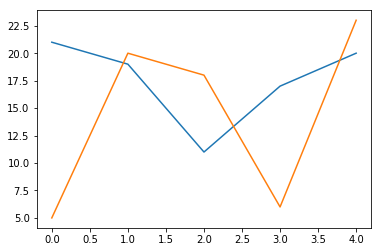

In [31]:
lst = [21, 19, 11, 17, 20]
lst_2 = np.random.randint(5, 25, 5)

plt.plot(lst)
plt.plot(lst_2)
plt.show()

#### Setting plot parameters

##### Figure size and labels

```python
lst = [21, 19, 11, 17, 20]
lst_2 = np.random.randint(5, 25, 5)

# Setting the size of the plot
fig = plt.figure(figsize=(7, 7))

# Setting the labels
plt.title('Plotting Lines')
plt.xlabel('X value')
plt.ylabel('Y value')

plt.plot(lst)
plt.plot(lst_2)

plt.show()
```

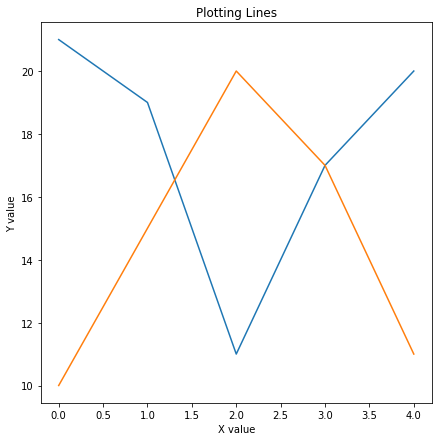

In [33]:
lst = [21, 19, 11, 17, 20]
lst_2 = np.random.randint(5, 25, 5)

# Setting the size of the plot
fig = plt.figure(figsize=(7, 7))

# Setting the labels
plt.title('Plotting Lines')
plt.xlabel('X value')
plt.ylabel('Y value')

plt.plot(lst)
plt.plot(lst_2)

plt.show()

###### Setting the range of the X axis

+ An array is used to do this
+ It must have the same number of elements as the data does
+ the plot() function accepts data in different ways
  + plot(y < list >) - will plot the list data, the x values will be 0., 1., ...
  + plot(x < list >, y < list >) - will plot the data using the x & y coordinates
  + plot(mat < list < list > >) - will plot data using columns to differentiate data


```python 
lst = [21, 19, 11, 17, 20]
lst_2 = np.random.randint(5, 25, 5)

# Setting the size of the plot
fig = plt.figure(figsize=(7, 7))

# Setting the labels
plt.title('Plotting Lines')
plt.xlabel('X value')
plt.ylabel('Y value')

# Define the x axis values
x = np.linspace(0, 100, len(lst))

# define a 2d array of x, y pairs
x_mat = np.vstack((np.linspace(0, 100, 5), np.linspace(0, 100, 5))).T
mat = np.vstack((np.random.randint(5, 25, 5), np.random.randint(5, 25, 5))).T

plt.plot(lst)
plt.plot(x, lst_2)
plt.plot(x_mat, mat)

plt.show()
```

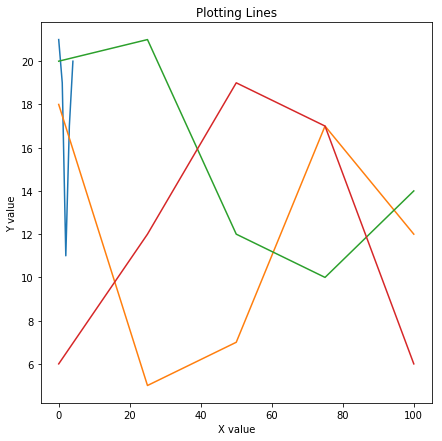

In [34]:
lst = [21, 19, 11, 17, 20]
lst_2 = np.random.randint(5, 25, 5)

# Setting the size of the plot
fig = plt.figure(figsize=(7, 7))

# Setting the labels
plt.title('Plotting Lines')
plt.xlabel('X value')
plt.ylabel('Y value')

# Define the x axis values
x = np.linspace(0, 100, len(lst))

# define a 2d array of x, y pairs
x_mat = np.vstack((np.linspace(0, 100, 5), np.linspace(0, 100, 5))).T
mat = np.vstack((np.random.randint(5, 25, 5), np.random.randint(5, 25, 5))).T

plt.plot(lst)
plt.plot(x, lst_2)
plt.plot(x_mat, mat)

plt.show()

#### Customizing the lines

```python
lst = [21, 19, 11, 17, 20]
lst_2 = np.random.randint(5, 25, (5, 3))

# Define the x axis values
x = np.linspace(0, 100, len(lst))

# Setting the size of the plot
fig = plt.figure(figsize=(7, 7))

# Setting the labels
plt.title('Plotting Lines')
plt.xlabel('X value')
plt.ylabel('Y value')

# solid line
plt.plot(x, lst, '-')
# dashed line
plt.plot(x, lst_2[:,0], '--')
# dotted line
plt.plot(x, lst_2[:,1], ':')
# dash dot line
plt.plot(x, lst_2[:,2], '-.')

plt.show()
```

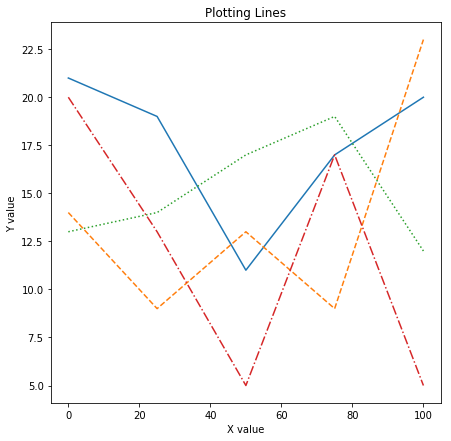

In [35]:
lst = [21, 19, 11, 17, 20]
lst_2 = np.random.randint(5, 25, (5, 3))

# Define the x axis values
x = np.linspace(0, 100, len(lst))

# Setting the size of the plot
fig = plt.figure(figsize=(7, 7))

# Setting the labels
plt.title('Plotting Lines')
plt.xlabel('X value')
plt.ylabel('Y value')

# solid line
plt.plot(x, lst, '-')
# dashed line
plt.plot(x, lst_2[:,0], '--')
# dotted line
plt.plot(x, lst_2[:,1], ':')
# dash dot line
plt.plot(x, lst_2[:,2], '-.')

plt.show()

##### Changing the line color

```python
lst = [21, 19, 11, 17, 20]
lst_2 = np.random.randint(5, 25, (5, 3))

# Define the x axis values
x = np.linspace(0, 100, len(lst))

# Setting the size of the plot
fig = plt.figure(figsize=(7, 7))

# Setting the labels
plt.title('Plotting Lines')
plt.xlabel('X value')
plt.ylabel('Y value')

# solid line
plt.plot(x, lst, '-', c='r')
# dashed line
plt.plot(x, lst_2[:,0], '--', c='r')
# dotted line
plt.plot(x, lst_2[:,1], '-', c='b')
# dash dot line
plt.plot(x, lst_2[:,2], '--', c='b')

plt.show()
```

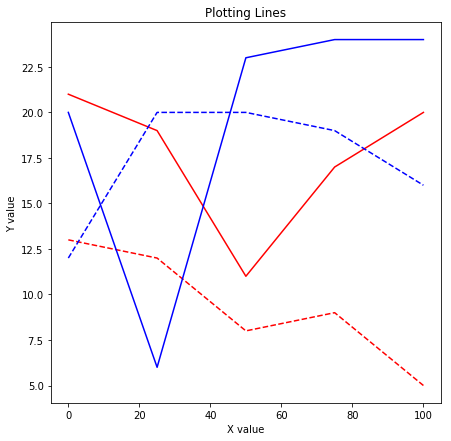

In [36]:
lst = [21, 19, 11, 17, 20]
lst_2 = np.random.randint(5, 25, (5, 3))

# Define the x axis values
x = np.linspace(0, 100, len(lst))

# Setting the size of the plot
fig = plt.figure(figsize=(7, 7))

# Setting the labels
plt.title('Plotting Lines')
plt.xlabel('X value')
plt.ylabel('Y value')

# solid line
plt.plot(x, lst, '-', c='r')
# dashed line
plt.plot(x, lst_2[:,0], '--', c='r')
# dotted line
plt.plot(x, lst_2[:,1], '-', c='b')
# dash dot line
plt.plot(x, lst_2[:,2], '--', c='b')

plt.show()

##### Limiting the axis

```python
lst = [21, 19, 11, 17, 20]
lst_2 = np.random.randint(5, 25, (5, 3))

# Define the x axis values
x = np.linspace(0, 100, len(lst))

# Setting the size of the plot
fig = plt.figure(figsize=(7, 7))

# Setting the labels
plt.title('Plotting Lines')
plt.xlabel('X value')
plt.ylabel('Y value')

# solid line
plt.plot(x, lst, '-', c='r')
# dashed line
plt.plot(x, lst_2[:,0], '--', c='r')
# dotted line
plt.plot(x, lst_2[:,1], '-', c='b')
# dash dot line
plt.plot(x, lst_2[:,2], '--', c='b')

# Set a limit on the x axis
plt.xlim((50, 100))

# You could do the same for the y axis

plt.show()
```

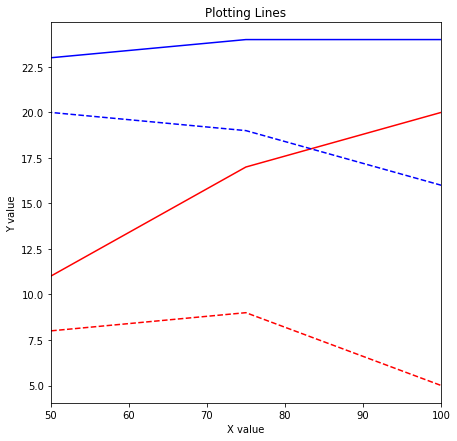

In [37]:
# Define the x axis values
x = np.linspace(0, 100, len(lst))

# Setting the size of the plot
fig = plt.figure(figsize=(7, 7))

# Setting the labels
plt.title('Plotting Lines')
plt.xlabel('X value')
plt.ylabel('Y value')

# solid line
plt.plot(x, lst, '-', c='r')
# dashed line
plt.plot(x, lst_2[:,0], '--', c='r')
# dotted line
plt.plot(x, lst_2[:,1], '-', c='b')
# dash dot line
plt.plot(x, lst_2[:,2], '--', c='b')

# Set a limit on the x axis
plt.xlim((50, 100))

# You could do the same for the y axis

plt.show()

##### Figure Legends

```python
#### lst = [21, 19, 11, 17, 20]
lst_2 = np.random.randint(5, 25, (5, 3))

# Define the x axis values
x = np.linspace(0, 100, len(lst))

# Setting the size of the plot
fig = plt.figure(figsize=(7, 7))

# Setting the labels
plt.title('Plotting Lines')
plt.xlabel('X value')
plt.ylabel('Y value')

# solid line
plt.plot(x, lst, '-', c='r', label='red solid')
# dashed line
plt.plot(x, lst_2[:,0], '--', c='r', label='red dash')
# dotted line
plt.plot(x, lst_2[:,1], '-', c='b', label='blue solid')
# dash dot line
plt.plot(x, lst_2[:,2], '--', c='b', label='blue dash')

# Set a limit on the x axis
plt.xlim((50, 100))

# You could do the same for the y axis

#Add the legend
plt.legend()

plt.show()
```

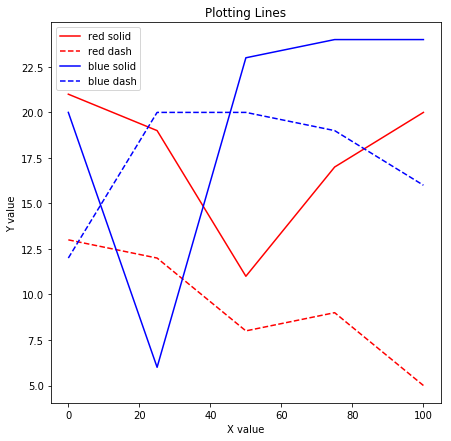

In [39]:
# Setting the size of the plot
fig = plt.figure(figsize=(7, 7))

# Setting the labels
plt.title('Plotting Lines')
plt.xlabel('X value')
plt.ylabel('Y value')

# solid line
plt.plot(x, lst, '-', c='r', label='red solid')
# dashed line
plt.plot(x, lst_2[:,0], '--', c='r', label='red dash')
# dotted line
plt.plot(x, lst_2[:,1], '-', c='b', label='blue solid')
# dash dot line
plt.plot(x, lst_2[:,2], '--', c='b', label='blue dash')

# Set a limit on the x axis
# plt.xlim((50, 100))

# You could do the same for the y axis

#Add the legend
plt.legend()

plt.show()

#### Histograms

We can start by generating some random numbers

```python
mu, sigma = 0, 0.5 # mean, standard deviation

lst = np.random.normal(mu, sigma, 1000)
```

In [40]:
mu, sigma = 0, 0.5 # mean, standard deviation

lst = np.random.normal(mu, sigma, 1000)
lst

array([ 5.14875993e-01,  2.93152966e-02, -1.38973254e-01,  3.56708342e-01,
        5.61474339e-01,  6.33289998e-01, -4.53568772e-01,  2.44768416e-04,
        2.17796530e-01, -8.93516208e-01, -4.14758471e-01,  2.57648360e-01,
        6.03514778e-01,  1.44775500e-01,  4.56613220e-01,  8.23912550e-01,
        5.92635699e-02, -2.28407355e-01,  1.33068013e-01,  8.06869447e-01,
       -5.89946579e-01, -2.28231971e-01,  4.75526423e-01,  4.55049385e-01,
       -5.31507177e-02,  5.92216112e-02,  4.46310320e-01,  3.11377162e-01,
       -3.65889397e-01,  9.91013419e-02, -7.84100690e-03, -4.10643649e-01,
        1.70597179e-01,  2.22807865e-01,  2.14377590e-01, -3.74626139e-01,
       -1.60209571e-02,  5.52513577e-02,  3.61918937e-01, -4.51472945e-01,
        1.04528778e+00, -8.49614323e-02, -5.32221092e-01,  4.74545897e-01,
       -3.35012439e-01,  5.69731942e-01,  6.74672365e-02,  6.52687297e-01,
       -5.84048968e-01,  7.97474894e-01, -9.24190670e-01,  3.38077907e-02,
        7.27505684e-01,  

Using the random numbers it is easy to generate a histogram.

```python
fig = plt.figure(figsize=(8, 5))

plt.hist(lst)

plt.show()
```

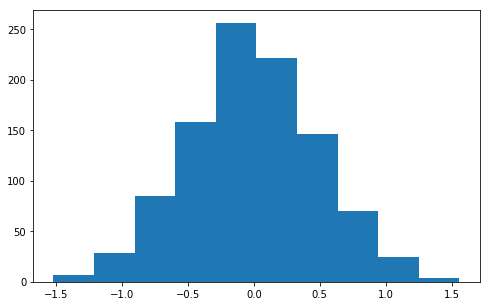

In [41]:
fig = plt.figure(figsize=(8, 5))

plt.hist(lst)

plt.show()

##### Customizing the histogram

Some additional arguments for the histogram function [https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hist.html#matplotlib.axes.Axes.hist]



In [42]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, *, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*. The return value is a
    tuple (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*,
    [*patches0*, *patches1*,...]) if the input contains multiple
    data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported at present.
    
    Parameters
    ----------
    x : (n,) array or sequence of (n,) arrays
        Input values, this takes either a single array or a sequence of
        

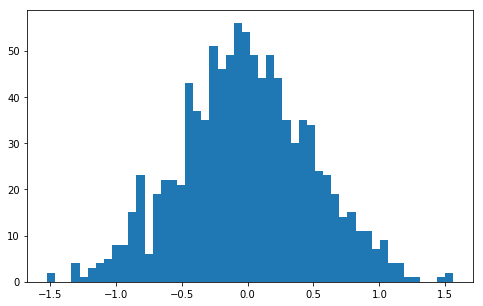

In [44]:
fig = plt.figure(figsize=(8, 5))
# We can make changes here
plt.hist(lst, bins=50)

plt.show()

#### Scatter plots

Start by generating random x, y pairs between 0 and 100
```python
mat = np.random.randint(0, 100, (100, 2))
```

In [45]:
mat = np.random.randint(0, 100, (100, 2))
mat

array([[61, 64],
       [ 4, 93],
       [62, 93],
       [42, 91],
       [21, 67],
       [88,  4],
       [92, 82],
       [36, 11],
       [17, 70],
       [13, 94],
       [ 2, 68],
       [66, 43],
       [68, 58],
       [32, 14],
       [61, 91],
       [33, 55],
       [36, 87],
       [89, 11],
       [40,  6],
       [50, 48],
       [47, 92],
       [28, 48],
       [80,  3],
       [32, 21],
       [35, 87],
       [89, 82],
       [82, 42],
       [33, 76],
       [21, 65],
       [66, 20],
       [89, 94],
       [53, 64],
       [74, 67],
       [56, 68],
       [35,  2],
       [99, 87],
       [51, 36],
       [47, 66],
       [23, 95],
       [93, 40],
       [42, 67],
       [57, 24],
       [99, 70],
       [61, 86],
       [79, 86],
       [55, 60],
       [53, 27],
       [35, 77],
       [59, 92],
       [20, 94],
       [47, 15],
       [38, 50],
       [74, 31],
       [20, 84],
       [ 3, 97],
       [79, 87],
       [89,  9],
       [71, 99],
       [32, 19

Make a scatter plot

```python
fig = plt.figure(figsize=(5, 5))

plt.scatter(mat[:,0], mat[:,1])

plt.show()
```

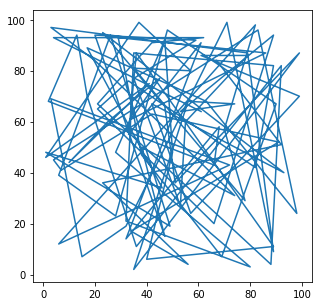

In [59]:
fig = plt.figure(figsize=(5, 5))

plt.plot(mat[:,0], mat[:,1])

plt.show()

In [47]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, data=None, **kwargs)
    A scatter plot of *y* vs *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        The data positions.
    
    s : scalar or array_like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : color, sequence, or sequence of color, optional
        The marker color. Possible values:
    
        - A single color format string.
        - A sequence of color specifications of length n.
        - A sequence of n numbers to be mapped to colors using *cmap* and
          *norm*.
        - A 2-D array in which the rows are RGB or RGBA.
    
        Note that *c* should not be a single numeric RGB or RGBA sequence
        because th

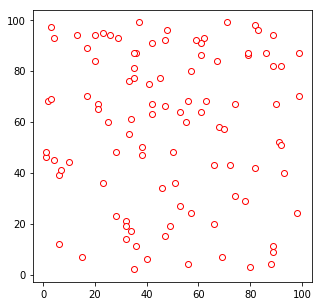

In [58]:
fig = plt.figure(figsize=(5, 5))

# Add some additional arguments
plt.scatter(mat[:,0], mat[:,1], marker='o', c='w', edgecolors='r')

plt.show()

#### Displaying 2D continuous data

Generate some data to display

```python
mu, sigma = 0, 500

mat = np.random.normal(mu, sigma, (50000, 2))

H, xe, ye =  np.histogram2d(mat[:,0], mat[:,1], bins=(100, 100))

```

plot the data


```python
fig = plt.figure(figsize=(8, 8))

plt.imshow(H)

plt.show()
```

In [61]:
mu, sigma = 0, 500

mat = np.random.normal(mu, sigma, (50000, 2))

H, xe, ye =  np.histogram2d(mat[:,0], mat[:,1], bins=(100, 100))
H

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [63]:
H.max()

63.0

In [69]:


# plt.imshow(HH > 20])

array([22., 22., 25., 21., 22., 21., 24., 24., 24., 21., 25., 23., 21.,
       28., 23., 24., 25., 23., 22., 26., 24., 23., 26., 24., 21., 23.,
       28., 22., 23., 25., 28., 34., 28., 24., 27., 21., 24., 24., 22.,
       23., 28., 21., 24., 24., 29., 24., 21., 32., 24., 29., 32., 25.,
       33., 23., 22., 27., 26., 27., 21., 22., 25., 26., 28., 34., 28.,
       31., 28., 32., 31., 34., 22., 33., 42., 26., 26., 26., 24., 28.,
       24., 23., 21., 22., 23., 22., 24., 21., 21., 32., 32., 36., 34.,
       30., 32., 26., 32., 33., 28., 28., 30., 36., 34., 24., 28., 22.,
       22., 26., 21., 23., 23., 26., 24., 25., 33., 25., 25., 32., 37.,
       30., 32., 47., 31., 42., 31., 46., 30., 36., 32., 48., 36., 35.,
       27., 26., 39., 21., 23., 26., 24., 22., 22., 26., 28., 38., 28.,
       31., 26., 29., 35., 35., 27., 45., 38., 38., 22., 36., 44., 29.,
       24., 38., 24., 38., 37., 28., 28., 22., 32., 23., 29., 24., 40.,
       37., 37., 41., 37., 47., 40., 44., 43., 39., 48., 41., 40